## CMS Medicare Part D Prescriber Summary Table 
### Project Part 2: Initial Exploratory Data Analysis
* Contains summary drug utilization, cost, and beneficiary information for Medicare Part D Prescibers for the calendar years 2013 - 2017

In [1]:
# Import Pyhon libraries
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import statistics

DATA_FOLDER = r"Datasets/Summary_Tables/"
os.chdir(DATA_FOLDER)
os.getcwd()

'C:\\Users\\theru\\DATA606\\Datasets\\Summary_Tables'

In [2]:
# Display file names
data_files = os.listdir()
data_files

['Medicare_Provider_Utilization_and_Payment_Data__Part_D_Prescriber_Summary_Table_CY2013.csv',
 'Medicare_Provider_Utilization_and_Payment_Data__Part_D_Prescriber_Summary_Table_CY2014.csv',
 'Medicare_Provider_Utilization_and_Payment_Data__Part_D_Prescriber_Summary_Table_CY2015.csv',
 'Medicare_Provider_Utilization_and_Payment_Data__Part_D_Prescriber_Summary_Table_CY2016.csv',
 'Medicare_Provider_Utilization_and_Payment_Data__Part_D_Prescriber_Summary_Table_CY2017.csv']

### Load Summary Table Files into Dataframe for Analysis

In [3]:
# Loop through files, extract year from filename, and load into dataframe
df_list = []

for file in data_files:
    df_tmp = pd.read_csv(file)
    df_tmp['year'] = file[82:86]   # find year based on filename
    df_list.append(df_tmp)   

dfSummaryTables = pd.concat(df_list)   # build combined dataset for all years
dfSummaryTables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5518978 entries, 0 to 1162897
Data columns (total 85 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   npi                               int64  
 1   nppes_provider_last_org_name      object 
 2   nppes_provider_first_name         object 
 3   nppes_provider_mi                 object 
 4   nppes_credentials                 object 
 5   nppes_provider_gender             object 
 6   nppes_entity_code                 object 
 7   nppes_provider_street1            object 
 8   nppes_provider_street2            object 
 9   nppes_provider_city               object 
 10  nppes_provider_zip5               float64
 11  nppes_provider_zip4               float64
 12  nppes_provider_state              object 
 13  nppes_provider_country            object 
 14  specialty_description             object 
 15  description_flag                  object 
 16  medicare_prvdr_enroll_status      ob

In [4]:
# Display random sample of records for review
dfSummaryTables.sample(10)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score,year
184932,1174676738,ZUCKER,MURRAY,L,M.D.,M,I,2455 BENNETT VALLEY RD STE C210,NaN,SANTA ROSA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
519466,1497772958,CONNERS,MICHAEL,S,MD,M,I,3400 NESCONSET HWY,"TECHNOLOGY DRIVE, SUITE 107",EAST SETAUKET,...,463.0,NaN,NaN,17.0,0.0,NaN,433.0,62.0,1.1747,2013
259231,1225438294,BYRD,JANET,K,FNP-C,F,I,19270 HIGHWAY 12,NaN,SONOMA,...,176.0,NaN,NaN,NaN,NaN,NaN,134.0,91.0,1.3284,2016
105473,1093793853,CIMOCH,PAUL,J,M.D.,M,I,1503 S COAST DR,SUITE #111,COSTA MESA,...,73.0,NaN,0.0,NaN,0.0,0.0,58.0,36.0,2.1950,2015
177626,1154393205,HOUCK,KAREN,NaN,MD,F,I,3401 N BROAD ST,7TH FLOOR OUT PATIENT BUILDING,PHILADELPHIA,...,NaN,21.0,0.0,0.0,0.0,NaN,16.0,21.0,1.9040,2017
209761,1194018689,WILLIAMS,JUSTIN,A,D.O.,M,I,UNIVERSITY OF KENTUCKY & AFFILIATES,800 ROSE ST.,LEXINGTON,...,NaN,NaN,0.0,NaN,0.0,0.0,30.0,16.0,2.6355,2015
789688,1699852228,KELM,MICHELLE,A,PA,F,I,1500 EAST MEDICAL CENTER DR,2ND FLOOR TAUBMAN CTR RECP F,ANN ARBOR,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,3.4857,2016
213645,1184913493,CLARK,JOSHUA,R,MD,M,I,4463 LA HIGHWAY 1 SOUTH,SUITE A,PORT ALLEN,...,NaN,238.0,0.0,0.0,0.0,NaN,79.0,208.0,1.1902,2016
1001585,1952418246,MEYER,NICHOLAS,J,DDS,M,I,7170 E MCDONALD DR,SUITE #11,SCOTTSDALE,...,19.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.8235,2013
988149,1891834073,KALISH,DAVID,M,DDS,M,I,3100 RIDGE AVE,NaN,MACON,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.7997,2015


### Display General Statistics for Several Key Features

In [5]:
dfSummaryTables[[
    'bene_count',
    'total_claim_count',
    'opioid_claim_count',
    'opioid_bene_count', 
    'la_opioid_claim_count',
    'la_opioid_bene_count', 
]
].describe(include='all')

,bene_count,total_claim_count,opioid_claim_count,opioid_bene_count,la_opioid_claim_count,la_opioid_bene_count
count,4.840546e+06,5.518978e+06,3.919623e+06,3.614306e+06,4.723516e+06,4.367906e+06
mean,1.519888e+02,1.305351e+03,9.931664e+01,3.228957e+01,1.032138e+01,1.767997e+00
std,1.957043e+02,3.142083e+03,3.093827e+02,5.636551e+01,7.161349e+01,1.370086e+01
min,1.100000e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.300000e+01,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.300000e+01,1.950000e+02,2.000000e+01,1.600000e+01,0.000000e+00,0.000000e+00
75%,2.020000e+02,9.860000e+02,7.400000e+01,4.200000e+01,0.000000e+00,0.000000e+00
max,3.996500e+04,4.472880e+05,2.642100e+04,3.633000e+03,8.444000e+03,1.310000e+03


In [6]:
dfSummaryTables['nppes_provider_state'].unique()

array(['MD', 'OH', 'NV', 'CA', 'WA', 'TN', 'PA', 'GA', 'CO', 'FL', 'TX',
       'OR', 'KY', 'SC', 'CT', 'NY', 'NJ', 'NC', 'MI', 'VA', 'AR', 'MA',
       'MS', 'IA', 'NH', 'MN', 'NE', 'IL', 'DC', 'OK', 'LA', 'ND', 'IN',
       'AZ', 'AL', 'PR', 'UT', 'HI', 'MO', 'KS', 'WI', 'RI', 'ID', 'NM',
       'WV', 'VT', 'ME', 'AE', 'MT', 'DE', 'WY', 'SD', 'AK', 'VI', 'GU',
       'ZZ', 'MP', 'AP', 'AA', 'AS', 'XX'], dtype=object)

### Overall Provider Characteristics (Not Opioid Specific)

In [4]:
# Create Provider-Registration Based Dataframe
df_provider_details = dfSummaryTables[[
    'npi',
    'nppes_provider_last_org_name',
    'nppes_provider_first_name',
    'nppes_provider_city',
    'nppes_provider_state',
    'nppes_provider_zip5',
    'nppes_provider_zip4',
    'specialty_description'
]]

df_provider_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5518978 entries, 0 to 1162897
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   npi                           int64  
 1   nppes_provider_last_org_name  object 
 2   nppes_provider_first_name     object 
 3   nppes_provider_city           object 
 4   nppes_provider_state          object 
 5   nppes_provider_zip5           float64
 6   nppes_provider_zip4           float64
 7   specialty_description         object 
dtypes: float64(2), int64(1), object(5)
memory usage: 379.0+ MB


In [5]:
# Remove duplicates based on NPI since Summary Table spans 5 years
df_provider_details = df_provider_details.drop_duplicates(subset='npi')
df_provider_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404428 entries, 0 to 1162864
Data columns (total 8 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   npi                           1404428 non-null  int64  
 1   nppes_provider_last_org_name  1404384 non-null  object 
 2   nppes_provider_first_name     1397620 non-null  object 
 3   nppes_provider_city           1404427 non-null  object 
 4   nppes_provider_state          1404428 non-null  object 
 5   nppes_provider_zip5           1404309 non-null  float64
 6   nppes_provider_zip4           1247130 non-null  float64
 7   specialty_description         1404428 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 96.4+ MB


In [37]:
df_provider_details.sample(10)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,nppes_provider_zip5,nppes_provider_zip4,specialty_description
689581,1659501708,WISNIEWSKA,AGNIESZKA,NEW YORK,NY,10022.0,2049.0,Psychiatry
281782,1265686950,ELAM,MARY,IOWA CITY,IA,52240.0,4034.0,Physician Assistant
579895,1558345504,FERRIS,MICHAEL,LINCOLN,NE,68506.0,1567.0,Otolaryngology
557925,1538125935,SIMON,DANIEL,CLEVELAND,OH,44106.0,5038.0,Cardiology
161638,1134576846,WALKER,CHRISTOPHER,BENSON,NC,27504.0,1725.0,Dentist
16890,1013329002,BABALOLA,OLUBANKE,LAKEWAY,TX,78734.0,6269.0,Nurse Practitioner
825568,1700992435,JOHNSTON,CHERYL,AUSTIN,TX,78745.0,1155.0,Physician Assistant
779053,1740254184,ODUKOMAIYA,HENRY,TAMPA,FL,33613.0,2752.0,Family Practice
1081093,1982090270,KARRI,SARADASRI,MEMPHIS,TN,38163.0,1.0,Student in an Organized Health Care Education/...
185503,1154859544,JAVED,ABID,CHARLESTON,SC,29425.0,8905.0,Internal Medicine


In [ ]:
# Determine provider count per state
df_provider_overview =  df_provider_details[[
    'nppes_provider_state',  
    'npi'    
]].groupby(['nppes_provider_state']).count().reset_index()

df_provider_overview.sample(10) 

In [ ]:
# Create dataframe for top ten states based on number of providers
df_provider_overview.sort_values(['npi'], ascending=True, inplace=True)   # sort by number of npi
df_top10_state = df_provider_overview.tail(10).copy()

col_names = {
    "npi": "provider_count"   # rename npi as provider_count
}

df_top10_state.rename(columns = col_names, inplace= True)

df_top10_state   # display top 10 by number of providers

In [ ]:
# Chart Top 10 States by Number of Providers
fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Top 10 States by Number of Providers")
ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Provider Total', fontsize=14)
df_top10_state.plot.bar(x='nppes_provider_state', y='provider_count',rot=0, ax=ax)

#### FINDINGS OF NOTE
* California has largest number of providers; not unexpected due to its population
* Florida ranks #4 despite overall large number of Medicare Recipients, quite far back from NY and CA

In [ ]:
# Determine provider count per specialty
df_provider_type =  df_provider_details[[
    'specialty_description',  
    'npi'    
]].groupby(['specialty_description']).count().reset_index()

df_provider_type.sample(10)

In [ ]:
# Create dataframe for top ten provider specialty types
df_provider_type.sort_values(['npi'], ascending=True, inplace=True)
df_top10_specialty = df_provider_type.tail(10).copy()

col_names = {
    "npi": "specialty_count"
}

df_top10_specialty.rename(columns = col_names, inplace= True)
df_top10_specialty

In [ ]:
# Chart Top 10 Provider Specialties
fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Top 10 Provider Specialty")
ax.set_xlabel('Specialty Description', fontsize=14)
ax.set_ylabel('Specialty Count', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')
df_top10_specialty.plot.bar(x='specialty_description', y='specialty_count', rot=45, ax=ax)

#### FINDINGS OF NOTE
* Nurse Practitioner as top presciber seems logical
* Top 6 specialties seem reasonable, but surprised students are authorized to directly prescribe medications
* The drop-off from Physician Assistant to Emergency Medicine is quite large and surprising

### Opioid Specific Provider Characteristics

In [7]:
# Determine total by state for all beneficiaries and those prescibed opioids
df_opioid_by_state = dfSummaryTables[[
    'nppes_provider_state',
    'bene_count', 
    'opioid_bene_count'
]].groupby(['nppes_provider_state']).sum().reset_index()

df_opioid_by_state.sample(10)

,nppes_provider_state,bene_count,opioid_bene_count
9,CO,9660382.0,1750995.0
41,OH,30439459.0,4912336.0
35,NE,4121997.0,638247.0
38,NM,4255014.0,659927.0
50,TX,46764542.0,7852385.0
48,SD,1944617.0,302157.0
39,NV,5511146.0,1056017.0
28,MN,12143238.0,1747151.0
24,MA,17473450.0,2072976.0
46,RI,2896657.0,349070.0


In [8]:
# Remove records without opioid-related beneficiaries
df_opioid_by_state = df_opioid_by_state[(df_opioid_by_state.opioid_bene_count != 0)].copy() 
df_opioid_by_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nppes_provider_state  61 non-null     object 
 1   bene_count            61 non-null     float64
 2   opioid_bene_count     61 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


In [9]:
df_opioid_by_state.sample(10)

,nppes_provider_state,bene_count,opioid_bene_count
6,AS,906.0,182.0
1,AE,22382.0,4966.0
15,GU,39994.0,4278.0
41,OH,30439459.0,4912336.0
14,GA,21397843.0,4095485.0
45,PR,10186469.0,1006829.0
7,AZ,15597315.0,2695282.0
49,TN,19125767.0,4120225.0
13,FL,58105201.0,8345389.0
25,MD,10397293.0,1584516.0


In [10]:
# Determine ratio of opioid beneficiaries to total beneficiaries
df_state_bene_ratio = pd.DataFrame()
df_state_bene_ratio = df_opioid_by_state[['nppes_provider_state', 'bene_count', 'opioid_bene_count']].copy()

df_state_bene_ratio['opioid_bene_ratio'] = (
    df_opioid_by_state['opioid_bene_count'] / df_opioid_by_state['bene_count']   # Opioid Benes / Total Benes
)

df_state_bene_ratio.sample(10)

,nppes_provider_state,bene_count,opioid_bene_count,opioid_bene_ratio
39,NV,5511146.0,1056017.0,0.191615
17,IA,7369519.0,1092027.0,0.148182
41,OH,30439459.0,4912336.0,0.161381
6,AS,906.0,182.0,0.200883
0,AA,3357.0,829.0,0.246947
45,PR,10186469.0,1006829.0,0.098840
1,AE,22382.0,4966.0,0.221875
3,AL,12829721.0,2803670.0,0.218529
15,GU,39994.0,4278.0,0.106966
24,MA,17473450.0,2072976.0,0.118636


In [11]:
# Remove territories, military bases and unknown/unidentified states
excluded_state = ['XX', 'AA', 'AE', 'AP', 'AS', 'GU', 'MP', 'VI', 'ZZ']
df_filtered_state = df_state_bene_ratio[~df_state_bene_ratio['nppes_provider_state'].isin(excluded_state)].copy()   # create new dataframe with filtered results
df_filtered_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 2 to 58
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nppes_provider_state  52 non-null     object 
 1   bene_count            52 non-null     float64
 2   opioid_bene_count     52 non-null     float64
 3   opioid_bene_ratio     52 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [12]:
# Sort dataframe by beneficiary ratio
df_filtered_state.sort_values(['opioid_bene_ratio'], ascending=True, inplace=True)
df_filtered_state.tail(10)

,nppes_provider_state,bene_count,opioid_bene_count,opioid_bene_ratio
33,NC,25956742.0,4898866.0,0.188732
18,ID,3226507.0,611861.0,0.189636
14,GA,21397843.0,4095485.0,0.191397
39,NV,5511146.0,1056017.0,0.191615
47,SC,12002753.0,2323783.0,0.193604
42,OK,7921666.0,1633543.0,0.206212
31,MS,7572240.0,1590633.0,0.210061
49,TN,19125767.0,4120225.0,0.215428
5,AR,7109801.0,1545407.0,0.217363
3,AL,12829721.0,2803670.0,0.218529


In [13]:
df_filtered_state.head(10)

,nppes_provider_state,bene_count,opioid_bene_count,opioid_bene_ratio
40,NY,50601816.0,4829335.0,0.095438
45,PR,10186469.0,1006829.0,0.098840
16,HI,2452006.0,270192.0,0.110192
10,CT,9291028.0,1054874.0,0.113537
37,NJ,19470496.0,2226393.0,0.114347
24,MA,17473450.0,2072976.0,0.118636
46,RI,2896657.0,349070.0,0.120508
11,DC,1213439.0,147637.0,0.121668
54,VT,1374983.0,175127.0,0.127367
34,ND,1795654.0,242193.0,0.134877


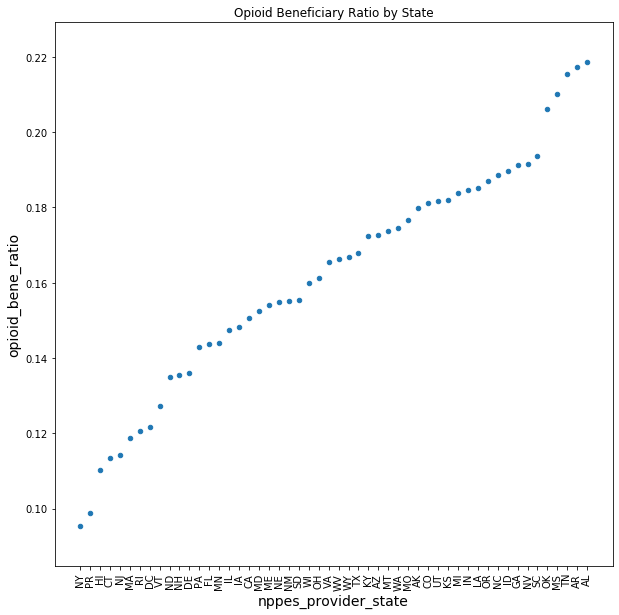

In [14]:
# Chart States by Opioid Beneficiary Ratio
fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Opioid Beneficiary Ratio by State")
ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Opioid Beneficiary Ratio', fontsize=14)
df_filtered_state.plot.scatter(x='nppes_provider_state', y='opioid_bene_ratio',rot=90, ax=ax)

#### FINDINGS OF NOTE
* Top 5 of Alabama, Arkansas, Tennessee, Mississippi, Oklahoma all coincide with the 2017 HHS-OIG Study (although slighly different order)
* New York and Hawaii as 2 of the bottom three also coincides with the 2017 HHS-OIG Study (Puerto Rico was not listed buy may have been excluded)
* The drop off between Oklahoma (#5 - 0.206212) and South Carolina (#6 - 0.193604) appears drastic

In [15]:
# Determine total by provider specialty for all beneficiaries and those prescibed opioids
df_opioid_by_specialty = dfSummaryTables[[
    'specialty_description',
    'bene_count', 
    'opioid_bene_count'
]].groupby(['specialty_description']).sum().reset_index()

df_opioid_by_specialty.sample(10)

,specialty_description,bene_count,opioid_bene_count
197,Personal Emergency Response Attendant,36460.0,4202.0
82,Exclusive Provider Organization,847.0,134.0
167,Nutritionist,373.0,0.0
85,Family Practice,131144765.0,23021379.0
33,Chiropractic,13436.0,1703.0
106,Homemaker,26.0,0.0
273,Surgical Oncology,156554.0,75872.0
49,Community Based Residential Treatment Facility...,89.0,0.0
26,Cardiovascular Disease (Cardiology),7007114.0,73756.0
123,Interventional Radiology,93122.0,21615.0


In [16]:
# Remove records without opioid-related beneficiaries
df_opioid_by_specialty = df_opioid_by_specialty[(df_opioid_by_specialty.opioid_bene_count != 0)].copy()
df_opioid_by_specialty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 286
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   specialty_description  175 non-null    object 
 1   bene_count             175 non-null    float64
 2   opioid_bene_count      175 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.5+ KB


In [17]:
# Determine ratio of opioid beneficiaries to total beneficiaries
df_specialty_bene_ratio = pd.DataFrame()
df_specialty_bene_ratio = df_opioid_by_specialty[['specialty_description', 'bene_count', 'opioid_bene_count']].copy()

df_specialty_bene_ratio['opioid_bene_ratio'] = (
    df_opioid_by_specialty['opioid_bene_count'] / df_opioid_by_specialty['bene_count']   # Opioid Benes / Total Benes
)

df_specialty_bene_ratio.sample(10)

,specialty_description,bene_count,opioid_bene_count,opioid_bene_ratio
204,Physical Therapist,5915.0,1259.0,0.212849
7,Allergy/Immunology,1229888.0,13834.0,0.011248
45,Clinical Psychologist,13370.0,232.0,0.017352
82,Exclusive Provider Organization,847.0,134.0,0.158205
9,Ambulance Service Supplier,152.0,40.0,0.263158
224,Psychologist (billing independently),18651.0,188.0,0.010080
242,Rehabilitation Practitioner,1645.0,223.0,0.135562
23,Cardiac Electrophysiology,1017290.0,41135.0,0.040436
98,Health Maintenance Organization,3454.0,467.0,0.135206
182,Orthopedic Surgery,12742844.0,7367200.0,0.578144


In [18]:
# Sort dataframe by beneficiary ratio
df_specialty_bene_ratio.sort_values(['opioid_bene_ratio'], ascending=True, inplace=True)
df_specialty_bene_ratio.tail(25)

,specialty_description,bene_count,opioid_bene_count,opioid_bene_ratio
279,Thoracic Surgery,403194.0,169256.0,0.419788
46,Colon & Rectal Surgery,6921.0,2969.0,0.428984
32,Certified Registered Nurse Anesthetist (CRNA),12328.0,5392.0,0.437378
154,Neurological Surgery,40435.0,19125.0,0.472981
208,Plastic Surgery,63980.0,30860.0,0.482338
273,Surgical Oncology,156554.0,75872.0,0.484638
90,General Surgery,6717412.0,3278804.0,0.488105
15,"Assistant, Podiatric",507.0,254.0,0.500986
272,Surgery,24588.0,12522.0,0.509273
209,Plastic and Reconstructive Surgery,978596.0,500583.0,0.511532


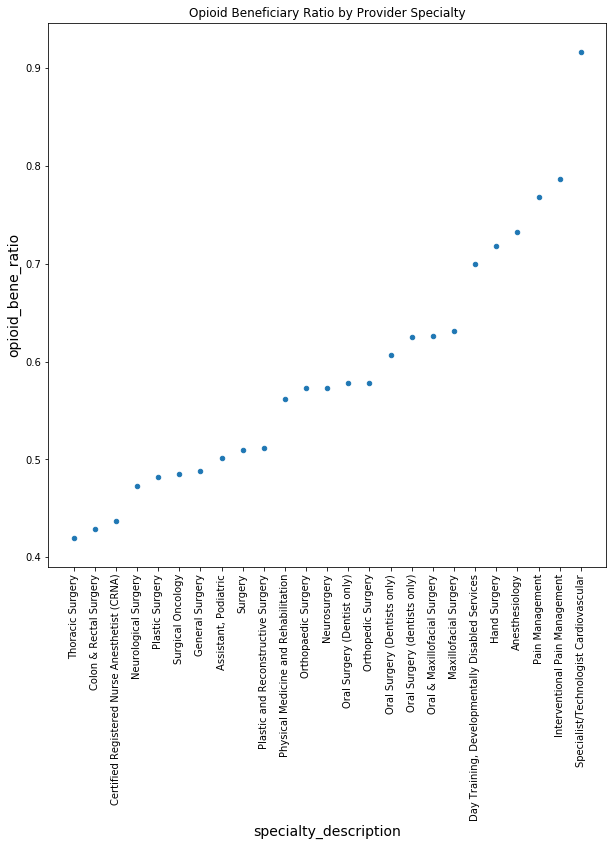

In [19]:
# Chart Top 25 Provider Specialty by Opioid Beneficiary Ratio
fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Opioid Beneficiary Ratio by Provider Specialty")
ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Opioid Beneficiary Ratio', fontsize=14)
df_specialty_bene_ratio.tail(25).plot.scatter(x='specialty_description', y='opioid_bene_ratio',rot=90, ax=ax)

#### FINDINGS OF NOTE
* Although Specialist/Technologist Cardiovascular has highest ratio it is based only on 12 beneficiaries
* Interventional Pain Management (0.786231) and Pain Management (0.768426) seem reasonable as the top 2 with large beneficiary base
* Out of ??? identified specialties which had opioid beneficiaries, the difference between Thoracic Surgery (#25 - 0.419788) and Interventional Pain Management (#2 - 0.786231) is quite high (0.366443)

### High-level Opioid-Specific Claims / Beneficiary Analysis

In [20]:
# Determine yearly sum of claims and beneficiaries along with opioid / long-acting opioid distinction
df_national = dfSummaryTables[[
    'year',
    'bene_count', 
    'total_claim_count',
    'opioid_claim_count', 
    'opioid_bene_count',
    'la_opioid_claim_count',
    'la_opioid_bene_count'
]].groupby(['year']).sum().reset_index()

df_national

,year,bene_count,total_claim_count,opioid_claim_count,opioid_bene_count,la_opioid_claim_count,la_opioid_bene_count
0,2013,129619226.0,1367849726,78509266.0,22608352.0,9771008.0,1549374.0
1,2014,139060640.0,1413986605,79997116.0,23645982.0,9977573.0,1589393.0
2,2015,148161808.0,1447087350,78509366.0,24140647.0,10084275.0,1616302.0
3,2016,155599561.0,1480972766,77790736.0,23711529.0,9820021.0,1550531.0
4,2017,163267476.0,1494307008,74477299.0,22597870.0,9100307.0,1416843.0


In [21]:
# Determine the percent change from 2013 to each subsequent year
df_national_trends = df_national[[
    'bene_count', 
    'total_claim_count', 
    'opioid_claim_count', 
    'opioid_bene_count',
    'la_opioid_claim_count',
    'la_opioid_bene_count']
].pct_change()

df_national_trends

,bene_count,total_claim_count,opioid_claim_count,opioid_bene_count,la_opioid_claim_count,la_opioid_bene_count
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.072840,0.033729,0.018951,0.045896,0.021141,0.025829
2,0.065447,0.023410,-0.018598,0.020920,0.010694,0.016930
3,0.050200,0.023416,-0.009153,-0.017776,-0.026205,-0.040692
4,0.049280,0.009004,-0.042594,-0.046967,-0.073290,-0.086221


In [22]:
# Add year column into trends dataframe
df_national_trends['year'] = df_national['year']
df_national_trends

,bene_count,total_claim_count,opioid_claim_count,opioid_bene_count,la_opioid_claim_count,la_opioid_bene_count,year
0,NaN,NaN,NaN,NaN,NaN,NaN,2013
1,0.072840,0.033729,0.018951,0.045896,0.021141,0.025829,2014
2,0.065447,0.023410,-0.018598,0.020920,0.010694,0.016930,2015
3,0.050200,0.023416,-0.009153,-0.017776,-0.026205,-0.040692,2016
4,0.049280,0.009004,-0.042594,-0.046967,-0.073290,-0.086221,2017


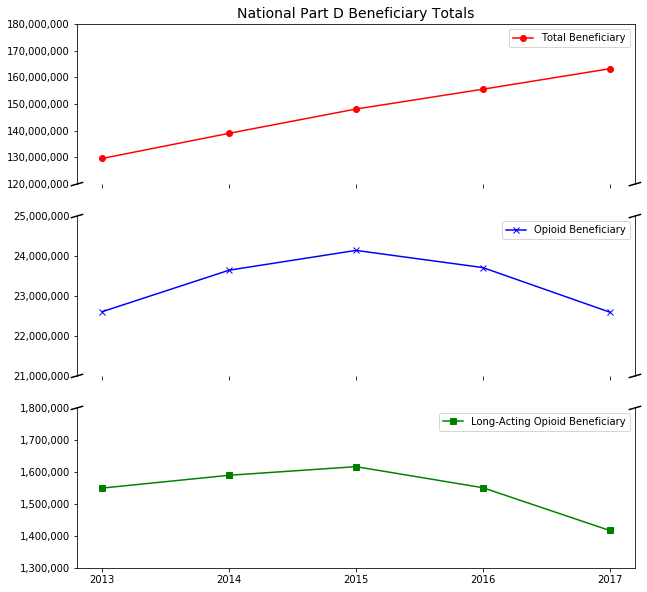

In [23]:
# Plot National Part D Beneficiary Totals
# based on example found here: https://matplotlib.org/xkcd/examples/pylab_examples/broken_axis.html

fig,(ax,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(10,10))

# plot the same data on all axes
ax.plot(df_national['year'], df_national['bene_count'], color='red', marker='o', label='Total Beneficiary')
ax2.plot(df_national['year'], df_national['opioid_bene_count'], color='blue', marker='x', label='Opioid Beneficiary')
ax3.plot(df_national['year'], df_national['la_opioid_bene_count'], color='green', marker='s', label='Long-Acting Opioid Beneficiary')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(120000000,180000000) # total benes (120M-180M)
ax2.set_ylim(21000000,25000000) # opioid benes (21M-25M)
ax3.set_ylim(1300000,1800000) # long-acting opioid benes (1.3M-1.8M)

# hide the spines between all axes 
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)

# Format y-axis to display millions cleanly
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax3.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Create break-marks for each range of charted totals
d = .010 # how big to make the diagonal lines in axes coordinates

# Set location to place break-marks for each axes
# bene_total bottom
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d,+d),(-d,+d), **kwargs)      # top-left diagonal
ax.plot((1-d,1+d),(-d,+d), **kwargs)    # top-right diagonal

# opioid bene total top
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal
ax2.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-right diagonal

# opioid bene total bottom
ax2.plot((-d,+d),(-d,+d), **kwargs)      # top-left diagonal
ax2.plot((1-d,1+d),(-d,+d), **kwargs)    # top-right diagonal

# long-acting opioid bene total top
kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal
ax3.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-right diagonal

ax.set_title('National Part D Beneficiary Totals', fontsize=14)
ax.legend()
ax2.legend()
ax3.legend()

plt.show()

#### FINDINGS OF NOTE
* Total beneficiaries experienced a fairly steady climb throughout the timeframe
* Beneficiaries receiving opioids rose until a peak in 2015 and then declined
* Beneficiaires receiving long-active opioids was fairly flat until 2015 and then declined

In [ ]:
# Plot National Part D Beneficiary Trends
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(df_national_trends['year'], (df_national_trends['bene_count']*100), color='red', marker='o', label='Total Beneficiary')
ax.plot(df_national_trends['year'], (df_national_trends['opioid_bene_count']*100), color='blue', marker='x', label='Opioid Beneficiary')
ax.plot(df_national_trends['year'], (df_national_trends['la_opioid_bene_count']*100), color='green', marker='s', label='Long-Acting Opioid Beneficiary')
ax.set_title('National Part D Beneficiary Trends', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percentage Change', fontsize=14)
ax.grid(True)
ax.legend()

#### FINDINGS OF NOTE
* Rate at which total beneficiaries rose slowed slightly from 2013 to 2017
* Rate at which beneficiaries received opioids declined steadily from 2013 to 2017
* Rate at which beneficiaries received long-acting opioids slowed from 2013 to 2015 and then drastically declined from 2015 to 2017

In [ ]:
# Plot National Part D Claim Totals
# based on example found here: https://matplotlib.org/xkcd/examples/pylab_examples/broken_axis.html

fig,(ax,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(10,10))

# plot the same data on all axes
ax.plot(df_national['year'], df_national['total_claim_count'], color='red', marker='o', label='Total Claims')
ax2.plot(df_national['year'], df_national['opioid_claim_count'], color='blue', marker='x', label='Opioid Claims')
ax3.plot(df_national['year'], df_national['la_opioid_claim_count'], color='green', marker='s', label='Long-Acting Opioid Claims')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(1300000000,1600000000) # total benes (1.3B-1.6B)
ax2.set_ylim(74000000,81000000) # opioid benes (74M-81M)
ax3.set_ylim(8000000,11000000) # long-acting opioid benes (8M-11M)

# hide the spines between all axes 
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)

# Format y-axis to display millions cleanly
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax3.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Create break-marks for each range of charted totals
d = .010 # how big to make the diagonal lines in axes coordinates

# Set location to place break-marks for each axes
# bene_total bottom
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d,+d),(-d,+d), **kwargs)      # top-left diagonal
ax.plot((1-d,1+d),(-d,+d), **kwargs)    # top-right diagonal

# opioid bene total top
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal
ax2.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-right diagonal

# opioid bene total bottom
ax2.plot((-d,+d),(-d,+d), **kwargs)      # top-left diagonal
ax2.plot((1-d,1+d),(-d,+d), **kwargs)    # top-right diagonal

# long-acting opioid bene total top
kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal
ax3.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-right diagonal

ax.set_title('National Part D Claim Totals', fontsize=14)
ax.legend()
ax2.legend()
ax3.legend()

plt.show()

#### FINDINGS OF NOTE
* Total claims experienced a fairly steady climb throughout the timeframe (similar to beneficiary totals)
* Claims including opioids rose until 2014 and then slowly declined (peaked 1 year earlier than beneficiary totals)
* Claims including long-active opioids was fairly flat until 2015 and then declined (similar to beneficiary totals)

In [ ]:
# Plot National Part D Claim Trends
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(df_national_trends['year'], (df_national_trends['total_claim_count']*100), color='red', marker='o', label='Total Claims')
ax.plot(df_national_trends['year'], (df_national_trends['opioid_claim_count']*100), color='blue', marker='x', label='Opioid Claims')
ax.plot(df_national_trends['year'], (df_national_trends['la_opioid_claim_count']*100), color='green', marker='s', label='Long-Acting Opioid Claims')
ax.set_title('National Part D Prescriber Claim Trends', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percentage Change', fontsize=14)
ax.grid(True)
ax.legend()

#### FINDINGS OF NOTE
* Rate at which total claims rose followed a similar pattern as beneficiary totals but at lower percentages
* Rate at which opioid-related claims changed did not follow a similar pattern as the beneficiary totals, with a dip 2015, followed by an increase in 2016 and then a sharp decline
* Rate at which long-acting opioid-related claims changed followed a similar pattern as beneficiary totals but at slightly lower rates

### Histogram of Prescriber Rate (Opioid and Long-Acting Opioid)

In [74]:
# Create dataframe with prescriber rates by provider and year
df_by_provider_rate = dfSummaryTables[[
    'npi',
    'year',
    'opioid_prescriber_rate', 
    'la_opioid_prescriber_rate'  
]]

df_by_provider_rate.sample(10)

,npi,year,opioid_prescriber_rate,la_opioid_prescriber_rate
641196,1588088934,2015,NaN,0.00
962975,1912954652,2013,NaN,0.00
237729,1215002779,2016,5.12,0.00
732745,1689642514,2014,0.00,NaN
1110555,1952497240,2017,3.81,5.75
333557,1316008964,2014,3.88,NaN
1151749,1992037121,2017,7.07,NaN
881797,1821055062,2014,NaN,0.00
339664,1316370927,2014,11.46,NaN
999373,1932146198,2014,NaN,0.00


In [ ]:
# Describe charateristic of dataframe values
df_by_provider_rate.describe()

In [75]:
# Create dataframe of providers whom have prescibed opioids
df_opioid_rate = df_by_provider_rate[df_by_provider_rate.opioid_prescriber_rate != 0] 
df_opioid_rate.describe()

,npi,opioid_prescriber_rate,la_opioid_prescriber_rate
count,4.088550e+06,2.489195e+06,3.293088e+06
mean,1.499763e+09,1.788571e+01,3.507559e+00
std,2.878888e+08,1.915463e+01,9.357896e+00
min,1.003000e+09,2.000000e-02,0.000000e+00
25%,1.245672e+09,3.820000e+00,0.000000e+00
50%,1.497971e+09,9.060000e+00,0.000000e+00
75%,1.740705e+09,2.704000e+01,0.000000e+00
max,1.993000e+09,1.000000e+02,1.000000e+02


Text(0, 0.5, 'Number of Providers')

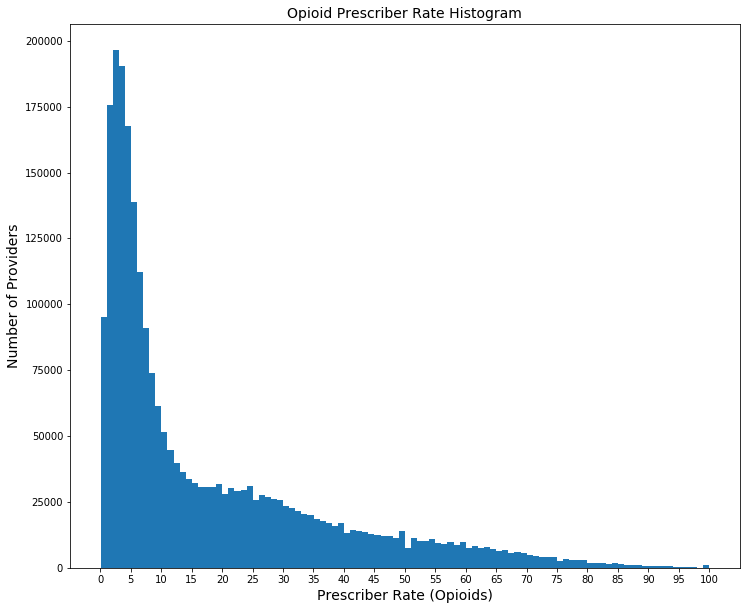

In [77]:
# Histogram of prescriber rate for providers which had opioid claims
fig, ax = plt.subplots(figsize=(12,10))
ax.hist(df_opioid_rate['opioid_prescriber_rate'], bins=100)
ax.set_xticks(range(0,101,5))
ax.set_title('Opioid Prescriber Rate Histogram', fontsize=14)
ax.set_xlabel('Prescriber Rate (Opioids)', fontsize=14)
ax.set_ylabel('Number of Providers', fontsize=14)

#### FINDINGS OF NOTE
* Provider prescriber rate for opioids has highest totals around 5% and then drops off sharply until around 15% before a steady decline

In [78]:
# Create dataframe of providers whom have prescibed long-acting opioids
df_long_acting_opioid_rate = df_by_provider_rate[df_by_provider_rate.la_opioid_prescriber_rate != 0] 
df_long_acting_opioid_rate.describe()

,npi,opioid_prescriber_rate,la_opioid_prescriber_rate
count,2.807494e+06,2.656559e+06,581604.000000
mean,1.499865e+09,6.791112e+00,19.860077
std,2.879335e+08,1.435450e+01,13.079272
min,1.003000e+09,0.000000e+00,0.260000
25%,1.245750e+09,0.000000e+00,10.130000
50%,1.497984e+09,0.000000e+00,17.070000
75%,1.740736e+09,6.080000e+00,26.830000
max,1.993000e+09,1.000000e+02,100.000000


Text(0, 0.5, 'Number of Providers')

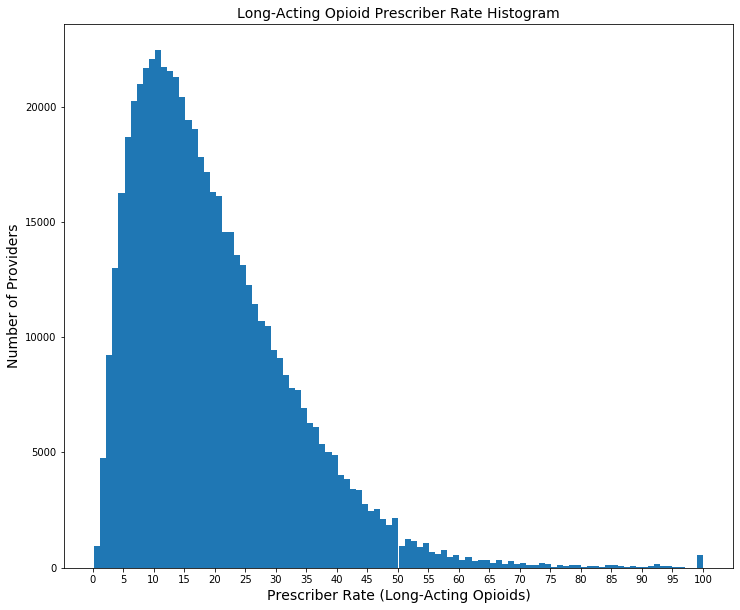

In [80]:
# Histogram of prescriber rate for providers which had long-acting opioid claims
fig, ax = plt.subplots(figsize=(12,10))
ax.hist(df_long_acting_opioid_rate['la_opioid_prescriber_rate'], bins=100)
ax.set_xticks(range(0,101,5))
ax.set_title('Long-Acting Opioid Prescriber Rate Histogram', fontsize=14)
ax.set_xlabel('Prescriber Rate (Long-Acting Opioids)', fontsize=14)
ax.set_ylabel('Number of Providers', fontsize=14)

#### FINDINGS OF NOTE
* Provider prescriber rate for long-acting opiods has highest totals around 10% and then slowly drops off until around 50% before a steady decline

## Prescriber Cost analysis (Opioid and Long-Acting Opioid)

In [24]:
# Create dataframe of provider opioid costs and claims
df_by_provider_costs = dfSummaryTables[[
    'npi',
    'year',
    'opioid_drug_cost', 
    'opioid_claim_count',
    'la_opioid_drug_cost', 
    'la_opioid_claim_count'
]]

df_by_provider_costs.sample(10)

,npi,year,opioid_drug_cost,opioid_claim_count,la_opioid_drug_cost,la_opioid_claim_count
267261,1245257203,2015,63.04,15.0,0.0,0.0
540711,1487995494,2015,NaN,NaN,0.0,0.0
281451,1245254002,2017,488.07,12.0,0.0,0.0
611441,1558406231,2015,0.00,0.0,0.0,0.0
88467,1083702849,2013,4528.75,428.0,NaN,NaN
702791,1669748570,2013,NaN,NaN,0.0,0.0
133540,1124035787,2015,0.00,0.0,0.0,0.0
520124,1487690160,2014,177.75,45.0,0.0,0.0
485372,1457344152,2014,52.18,14.0,0.0,0.0
530684,1457549826,2017,0.00,0.0,0.0,0.0


In [25]:
df_by_provider_costs.describe()

,npi,opioid_drug_cost,opioid_claim_count,la_opioid_drug_cost,la_opioid_claim_count
count,5.518978e+06,3.919623e+06,3.919623e+06,4.723516e+06,4.723516e+06
mean,1.499799e+09,4.836484e+03,9.931664e+01,2.004491e+03,1.032138e+01
std,2.879224e+08,3.146422e+04,3.093827e+02,1.723417e+04,7.161349e+01
min,1.003000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.245678e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.497973e+09,1.918800e+02,2.000000e+01,0.000000e+00,0.000000e+00
75%,1.740703e+09,1.293290e+03,7.400000e+01,0.000000e+00,0.000000e+00
max,1.993000e+09,8.504571e+06,2.642100e+04,2.572731e+06,8.444000e+03


In [26]:
df_by_provider_costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5518978 entries, 0 to 1162897
Data columns (total 6 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   npi                    int64  
 1   year                   object 
 2   opioid_drug_cost       float64
 3   opioid_claim_count     float64
 4   la_opioid_drug_cost    float64
 5   la_opioid_claim_count  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 294.7+ MB


In [27]:
# Create dataframe with opioid cost and claim count sums by provider
df_opioid_cost = df_by_provider_costs[[
    'npi',
    'opioid_drug_cost', 
    'opioid_claim_count'
]].groupby(['npi']).sum().reset_index()

df_opioid_cost.describe()

,npi,opioid_drug_cost,opioid_claim_count
count,1.404428e+06,1.404428e+06,1.404428e+06
mean,1.499875e+09,1.349816e+04,2.771832e+02
std,2.878994e+08,1.066236e+05,1.110735e+03
min,1.003000e+09,0.000000e+00,0.000000e+00
25%,1.245769e+09,0.000000e+00,0.000000e+00
50%,1.497986e+09,4.031000e+01,1.100000e+01
75%,1.740734e+09,1.907425e+03,1.440000e+02
max,1.993000e+09,1.793724e+07,9.930700e+04


In [29]:
# Add column with calculated average opioid cost
df_opioid_avg_cost = pd.DataFrame()
df_opioid_avg_cost = df_opioid_cost[['npi', 'opioid_drug_cost', 'opioid_claim_count']].copy()

df_opioid_avg_cost['avg_cost'] = (
    df_opioid_cost['opioid_drug_cost'] / df_opioid_cost['opioid_claim_count']   # Drug Cost / # of Claims
)

df_opioid_avg_cost.sample(10)

,npi,opioid_drug_cost,opioid_claim_count,avg_cost
1115931,1790745537,0.00,0.0,NaN
768843,1548497894,846.98,27.0,31.369630
724834,1518351089,0.00,0.0,NaN
622455,1447288311,1701.40,117.0,14.541880
282840,1205090990,0.00,0.0,NaN
663263,1477550168,494.77,72.0,6.871806
373912,1265641450,0.00,0.0,NaN
1249362,1881984532,770.99,91.0,8.472418
935788,1669617866,0.00,0.0,NaN
375551,1265717474,287.53,34.0,8.456765


In [30]:
# Remove providers with no opioid-related claims
df_opioid_avg_cost = df_opioid_avg_cost[(df_opioid_avg_cost.opioid_drug_cost != 0) & (df_opioid_avg_cost.opioid_claim_count != 0)] 
df_opioid_avg_cost.describe()

,npi,opioid_drug_cost,opioid_claim_count,avg_cost
count,7.044630e+05,7.044630e+05,704463.000000,704463.000000
mean,1.499829e+09,2.691013e+04,552.596493,25.807184
std,2.878782e+08,1.493442e+05,1519.011957,43.234019
min,1.003000e+09,9.850000e+00,11.000000,0.434613
25%,1.245699e+09,5.094100e+02,46.000000,7.526267
50%,1.497984e+09,1.891520e+03,143.000000,14.486512
75%,1.740699e+09,1.040007e+04,450.000000,30.239096
max,1.993000e+09,1.793724e+07,99307.000000,5778.872143


In [31]:
df_opioid_avg_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704463 entries, 0 to 1404426
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   npi                 704463 non-null  int64  
 1   opioid_drug_cost    704463 non-null  float64
 2   opioid_claim_count  704463 non-null  float64
 3   avg_cost            704463 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 26.9 MB


In [32]:
# Sort dataframe and show top 50 providers based on average cost
df_opioid_avg_cost.sort_values(['avg_cost'], ascending=True, inplace=True)
df_opioid_avg_cost.tail(50).sample(10)

,npi,opioid_drug_cost,opioid_claim_count,avg_cost
1296078,1922091875,536221.87,317.0,1691.551640
819092,1588631428,76073.23,41.0,1855.444634
1123872,1801003991,58919.02,24.0,2454.959167
543072,1386758704,371358.13,231.0,1607.610952
152484,1104931542,1602129.52,498.0,3217.127550
1019587,1720231962,263478.32,120.0,2195.652667
255680,1184609398,178099.44,129.0,1380.615814
858778,1619067071,361823.13,75.0,4824.308400
59489,1043275118,1357779.51,791.0,1716.535411
694725,1497740062,129289.82,66.0,1958.936667


In [38]:
# Merge top 50 providers by average opioid cost with provider details
df_merged_opioid_top_x = pd.merge(df_opioid_avg_cost.tail(50), df_provider_details, how="inner", on="npi")
df_merged_opioid_top_x.tail(10)

,npi,opioid_drug_cost,opioid_claim_count,avg_cost,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,nppes_provider_zip5,nppes_provider_zip4,specialty_description
40,1245394196,7547748.48,2289.0,3297.399948,STERLING,MELVYN,ORANGE,CA,92868.0,3854.0,Internal Medicine
41,1720328925,59860.38,17.0,3521.198824,KAMUDA,BRIAN,SKOKIE,IL,60077.0,1034.0,Nurse Practitioner
42,1659542702,1755276.61,495.0,3546.013354,ZAMAN,AAMIR,CLIFTON,NJ,7013.0,2468.0,Hematology/Oncology
43,1063558682,818641.36,225.0,3638.406044,BALMANOUKIAN,ANI,BALTIMORE,MD,21287.0,5.0,Hematology/Oncology
44,1154657468,2175180.57,557.0,3905.171580,AYERS,SHEILA,MEMPHIS,TN,38120.0,2146.0,Nurse Practitioner
45,1174575187,3086470.62,719.0,4292.726871,VOUDOURIS,DIALECTI,NEW YORK,NY,10028.0,880.0,Hematology/Oncology
46,1619067071,361823.13,75.0,4824.308400,OSWARI,ANDREW,CAMDEN,NJ,8102.0,1116.0,Family Practice
47,1356380851,324405.12,61.0,5318.116721,RUCKDESCHEL,JOHN,LAS VEGAS,NV,89128.0,443.0,Medical Oncology
48,1013980853,2918733.10,519.0,5623.763198,UDHRAIN,ASHISH,SKOKIE,IL,60077.0,1034.0,Hematology/Oncology
49,1194774695,80904.21,14.0,5778.872143,DAWE,GEORGE,LEWISTOWN,PA,17044.0,2115.0,Family Practice


In [39]:
df_merged_opioid_top_x.head(10)

,npi,opioid_drug_cost,opioid_claim_count,avg_cost,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,nppes_provider_zip5,nppes_provider_zip4,specialty_description
0,1184609398,178099.44,129.0,1380.615814,FRIEDMAN,MICHAEL,PROVIDENCE,RI,2905.0,3240.0,Psychiatry
1,1043383987,81175.32,58.0,1399.574483,RICCI,JOHN,MANASQUAN,NJ,8736.0,1500.0,Internal Medicine
2,1881699791,29466.34,21.0,1403.159048,ADLER,MITCHELL,NEW YORK,NY,10016.0,4974.0,Internal Medicine
3,1689671380,353078.68,247.0,1429.468340,ALEVIZOS,JOHN,IRVINE,CA,92618.0,2832.0,Family Practice
4,1922237486,211594.35,148.0,1429.691554,DAS,DEVIKA,BIRMINGHAM,AL,35249.0,1900.0,Internal Medicine
5,1124107909,7228509.02,5028.0,1437.650959,KESTEN,JEFFREY,GOLDEN,CO,80401.0,3600.0,Physical Medicine and Rehabilitation
6,1861443483,1315329.44,900.0,1461.477156,STARK-VANCE,VIRGINIA,DALLAS,TX,75230.0,NaN,Hematology/Oncology
7,1437128113,113962.32,77.0,1480.030130,NGUYEN,TAM,N LAS VEGAS,NV,89030.0,7187.0,Radiation Oncology
8,1740215284,683564.59,454.0,1505.648877,MAJOR,MALCOLM,PLANTATION,FL,33324.0,1807.0,Critical Care (Intensivists)
9,1992162457,248519.43,164.0,1515.362378,SPRINGMAN,KATHERINE,INDIANAPOLIS,IN,46237.0,8601.0,Nurse Practitioner


In [40]:
# Determine frequency of specialty description for top 50
df_merged_opioid_specailty = df_merged_opioid_top_x[[
    'specialty_description',
    'npi'
]].groupby(['specialty_description']).count().reset_index()

df_merged_opioid_specailty.rename(columns = {"npi": "provider_count"}, inplace= True)   # rename count column
df_merged_opioid_specailty.sort_values(['provider_count'], ascending=True, inplace=True)   # sort by count

df_merged_opioid_specailty

,specialty_description,provider_count
0,Critical Care (Intensivists),1
4,Medical Oncology,1
6,"Neuromusculoskeletal Medicine, Sports Medicine",1
8,Optometry,1
9,Pediatric Medicine,1
12,Psychiatry & Neurology,1
13,Psychologist,1
14,Pulmonary Disease,1
5,Neurology,2
10,Physical Medicine and Rehabilitation,2


([<matplotlib.patches.Wedge at 0x1cd3902f888>,
 [Text(-0.0690695699404515, 1.0978294013681003, 'Critical Care (Intensivists)'),
  Text(-0.20611944149186284, 1.080515976669981, 'Medical Oncology'),
  Text(-0.3399186864662843, 1.0461621703115804, 'Neuromusculoskeletal Medicine, Sports Medicine'),
  Text(-0.46835721093687943, 0.9953097623169521, 'Optometry'),
  Text(-0.589409462737721, 0.9287607255021237, 'Pediatric Medicine'),
  Text(-0.7011663756300295, 0.8475645778852774, 'Psychiatry & Neurology'),
  Text(-0.8018654764158345, 0.7530018311613904, 'Psychologist'),
  Text(-0.8899186801919162, 0.6465637962687659, 'Pulmonary Disease'),
  Text(-0.995309745872914, 0.4683572458822384, 'Neurology'),
  Text(-1.0805159694331197, 0.20611947942881534, 'Physical Medicine and Rehabilitation'),
  Text(-1.0978294037931344, -0.0690695313956238, 'Psychiatry'),
  Text(-0.9953097787609891, -0.4683571759915195, 'Family Practice'),
  Text(-0.5299290983695926, -0.9639373167904597, 'Radiation Oncology'),
  Tex

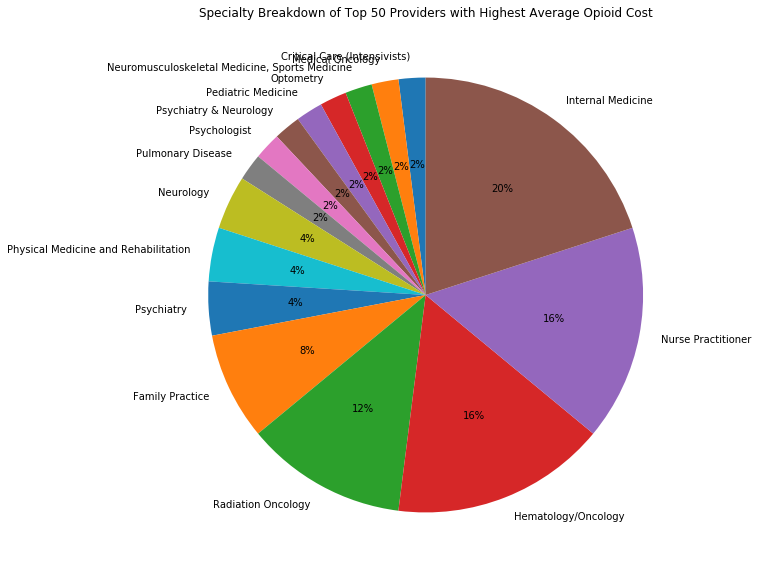

In [41]:
# Generate Provider Specialty Pie Chart Breakdown for Top 50
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('white')
ax.set_title("Specialty Breakdown of Top 50 Providers with Highest Average Opioid Cost")
ax.pie(x=df_merged_opioid_specailty['provider_count'], labels=df_merged_opioid_specailty['specialty_description'], startangle=90, autopct='%.0f%%')

#### FINDINGS OF NOTE
* (Average Opioid Cost = Total Opioid Drug Cost / Total Opioid Claims) on a provider basis
* Of the top 50 providers with highest average opioid cost (range of 1380.62 - 5778.87) the most frequent specialties were Internal Medicine (20%), Nurse Practitioner (16%), Hematology/Oncology (16%), and Radiation Oncology (12%).

In [42]:
# Create dataframe with long-acting opioid cost and claim count sums by provider
df_la_opioid_cost = df_by_provider_costs[[
    'npi',
    'la_opioid_drug_cost', 
    'la_opioid_claim_count'
]].groupby(['npi']).sum().reset_index()

df_la_opioid_cost.describe()

,npi,la_opioid_drug_cost,la_opioid_claim_count
count,1.404428e+06,1.404428e+06,1.404428e+06
mean,1.499875e+09,6.741710e+03,3.471391e+01
std,2.878994e+08,6.505169e+04,2.733089e+02
min,1.003000e+09,0.000000e+00,0.000000e+00
25%,1.245769e+09,0.000000e+00,0.000000e+00
50%,1.497986e+09,0.000000e+00,0.000000e+00
75%,1.740734e+09,0.000000e+00,0.000000e+00
max,1.993000e+09,1.071372e+07,3.414800e+04


In [43]:
# Add column with calculated average long-acting opioid cost
df_la_opioid_avg_cost = pd.DataFrame()
df_la_opioid_avg_cost = df_la_opioid_cost[['npi', 'la_opioid_drug_cost', 'la_opioid_claim_count']].copy()

df_la_opioid_avg_cost['avg_cost'] = (
    df_la_opioid_cost['la_opioid_drug_cost'] / df_la_opioid_cost['la_opioid_claim_count']   # Drug Cost / # of Claims
)

df_la_opioid_avg_cost.sample(10)

,npi,la_opioid_drug_cost,la_opioid_claim_count,avg_cost
1309964,1932193315,0.00,0.0,NaN
839833,1598867319,0.00,0.0,NaN
320375,1225391733,1993.14,26.0,76.659231
151431,1104901552,0.00,0.0,NaN
263691,1184844219,5961.72,161.0,37.029317
1309902,1932192176,0.00,0.0,NaN
1068710,1760427496,0.00,0.0,NaN
1034974,1730390725,0.00,0.0,NaN
326113,1235166323,0.00,0.0,NaN
950345,1679726251,0.00,0.0,NaN


In [44]:
# Remove providers with no long-acting opioid-related claims
df_la_opioid_avg_cost = df_la_opioid_avg_cost[(df_la_opioid_avg_cost.la_opioid_drug_cost != 0) & (df_la_opioid_avg_cost.la_opioid_claim_count != 0)] 
df_la_opioid_avg_cost.describe()

,npi,la_opioid_drug_cost,la_opioid_claim_count,avg_cost
count,1.829140e+05,1.829140e+05,182914.000000,182914.000000
mean,1.499431e+09,5.176337e+04,266.536099,173.703763
std,2.878424e+08,1.736697e+05,715.366126,162.719427
min,1.003000e+09,6.750000e+00,11.000000,0.250000
25%,1.245673e+09,3.649648e+03,31.000000,84.483476
50%,1.497964e+09,1.205778e+04,89.000000,130.037778
75%,1.740694e+09,3.764486e+04,233.000000,208.371867
max,1.993000e+09,1.071372e+07,34148.000000,7610.470725


In [45]:
df_la_opioid_avg_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182914 entries, 1 to 1404421
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   npi                    182914 non-null  int64  
 1   la_opioid_drug_cost    182914 non-null  float64
 2   la_opioid_claim_count  182914 non-null  float64
 3   avg_cost               182914 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 7.0 MB


In [46]:
# Sort dataframe and show top 50 providers based on average cost
df_la_opioid_avg_cost.sort_values(['avg_cost'], ascending=True, inplace=True)
df_la_opioid_avg_cost.tail(50).sample(10)

,npi,la_opioid_drug_cost,la_opioid_claim_count,avg_cost
137348,1093880759,111408.48,49.0,2273.642449
1074606,1760587034,29747.66,12.0,2478.971667
76058,1053441121,223702.74,62.0,3608.108710
1015875,1720098247,273046.91,98.0,2786.192959
1293561,1922040260,1588440.37,592.0,2683.176301
1380003,1982631198,46499.43,13.0,3576.879231
835924,1598757940,196620.97,75.0,2621.612933
1228082,1871637694,150389.07,56.0,2685.519107
1209270,1861434342,43642.82,14.0,3117.344286
1054743,1750330734,140167.09,53.0,2644.662075


In [47]:
df_la_opioid_avg_cost.tail(50).sample(10)

,npi,la_opioid_drug_cost,la_opioid_claim_count,avg_cost
1209270,1861434342,43642.82,14.0,3117.344286
812205,1578842332,36124.32,13.0,2778.793846
696466,1497779441,163305.82,69.0,2366.751014
1380003,1982631198,46499.43,13.0,3576.879231
151534,1104904689,128833.83,53.0,2430.826981
1126612,1801133343,45737.05,13.0,3518.234615
453678,1326073354,62014.03,18.0,3445.223889
990825,1700827375,104380.88,30.0,3479.362667
835924,1598757940,196620.97,75.0,2621.612933
1070320,1760461115,354991.85,150.0,2366.612333


In [48]:
# Merge top 50 by average long-acting opioid cost with provider details
df_merged_la_opioid_top_x = pd.merge(df_la_opioid_avg_cost.tail(50), df_provider_details, how="inner", on="npi")
df_merged_la_opioid_top_x.sample(10)

,npi,la_opioid_drug_cost,la_opioid_claim_count,avg_cost,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,nppes_provider_zip5,nppes_provider_zip4,specialty_description
22,1558345348,334415.98,127.0,2633.196693,HARDY,RUSSELL,UKIAH,CA,95482.0,4533.0,Hematology/Oncology
16,1407825920,275571.50,113.0,2438.685841,GLORIA,STEPHEN,OAK RIDGE,NJ,7438.0,9370.0,Family Practice
26,1871637694,150389.07,56.0,2685.519107,ROBERTS,TRACIE,LEWES,DE,19958.0,4314.0,Nurse Practitioner
41,1801133343,45737.05,13.0,3518.234615,VOORHIS,STEPHANIE,CONWAY,MO,65632.0,8322.0,Nurse Practitioner
11,1598937880,70875.51,30.0,2362.517000,MARTYR,SABRINA,HARRISBURG,PA,17109.0,5317.0,Internal Medicine
48,1386758704,161412.47,24.0,6725.519583,YUNG,DAVID,SCARSDALE,NY,10583.0,4523.0,Internal Medicine
17,1760587034,29747.66,12.0,2478.971667,KOLEHMA,KERRI,N CHARLESTON,SC,29405.0,8211.0,Physical Medicine and Rehabilitation
36,1194940783,126955.15,40.0,3173.878750,CHRISTIAN,BETH,COLUMBUS,OH,43210.0,1280.0,Hematology/Oncology
10,1609890862,159399.19,68.0,2344.105735,LIGUORI,JAMES,NEW HYDE PARK,NY,11042.0,1017.0,Neurology
46,1598838393,184634.92,44.0,4196.248182,SCHREIBER,ZWI,BRONX,NY,10457.0,NaN,Hematology


In [49]:
df_merged_la_opioid_top_x.tail(10)

,npi,la_opioid_drug_cost,la_opioid_claim_count,avg_cost,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,nppes_provider_zip5,nppes_provider_zip4,specialty_description
40,1700827375,104380.88,30.0,3479.362667,GRAFF,KERRY,CANANDAIGUA,NY,14424.0,2242.0,Family Practice
41,1801133343,45737.05,13.0,3518.234615,VOORHIS,STEPHANIE,CONWAY,MO,65632.0,8322.0,Nurse Practitioner
42,1982631198,46499.43,13.0,3576.879231,CREECH,CHARLOTTE,SUFFERN,NY,10901.0,4164.0,Family Practice
43,1053441121,223702.74,62.0,3608.108710,BRUNING,KARLA,LIVINGSTON,TX,77351.0,8413.0,Family Practice
44,1609926815,40731.32,11.0,3702.847273,VERHOEVE,PAUL,EL CAJON,CA,92021.0,4994.0,Internal Medicine
45,1740270313,385445.84,95.0,4057.324632,SANDLER,JEFFREY,SAN DIEGO,CA,92103.0,2116.0,Internal Medicine
46,1598838393,184634.92,44.0,4196.248182,SCHREIBER,ZWI,BRONX,NY,10457.0,NaN,Hematology
47,1609861574,259912.70,39.0,6664.428205,MCKEE,CHARLES,APPLETON,WI,54913.0,NaN,Family Practice
48,1386758704,161412.47,24.0,6725.519583,YUNG,DAVID,SCARSDALE,NY,10583.0,4523.0,Internal Medicine
49,1053309914,525122.48,69.0,7610.470725,VOGELGESANG,SCOTT,IOWA CITY,IA,52242.0,1009.0,Rheumatology


In [50]:
df_merged_la_opioid_top_x.head(10)

,npi,la_opioid_drug_cost,la_opioid_claim_count,avg_cost,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,nppes_provider_zip5,nppes_provider_zip4,specialty_description
0,1700846185,38065.07,17.0,2239.121765,KRISHNAN,RAJMANI,SMITHTOWN,NY,11787.0,4280.0,Anesthesiology
1,1649487547,178732.50,79.0,2262.436709,GIORLANDO,STEPHANIE,ALEXANDRIA,VA,22334.0,1.0,Physical Medicine and Rehabilitation
2,1871567115,27186.48,12.0,2265.540000,DHILLON,KUSHLEEN,BARTLETT,IL,60103.0,4508.0,Internal Medicine
3,1093880759,111408.48,49.0,2273.642449,SONNENBERG,FRANK,NEW BRUNSWICK,NJ,8901.0,1962.0,Internal Medicine
4,1427064153,29694.99,13.0,2284.230000,KIM,JUNGYOP,E PATCHOGUE,NY,11772.0,4870.0,Internal Medicine
5,1396780367,107477.34,47.0,2286.751915,SIMONS,RHONDA,KANSAS CITY,MO,64133.0,1713.0,Family Practice
6,1831168640,107539.93,47.0,2288.083617,COHEN,JEFFREY,MARIETTA,GA,30060.0,7241.0,Colorectal Surgery (formerly proctology)
7,1558352740,98827.78,43.0,2298.320465,FALLER,JASON,NEW YORK,NY,10019.0,3159.0,Rheumatology
8,1164524534,230691.35,100.0,2306.913500,FISHER,MICHAEL,OAK RIDGE,TN,37830.0,7762.0,Psychiatry
9,1518936426,25625.22,11.0,2329.565455,GLAESNER,EDWARD,CARY,NC,27518.0,6118.0,Nurse Practitioner


In [51]:
# Determine frequency of specialty description for top 50
df_merged_la_opioid_specailty = df_merged_la_opioid_top_x[[
    'specialty_description',
    'npi'
]].groupby(['specialty_description']).count().reset_index()

df_merged_la_opioid_specailty.rename(columns = {"npi": "provider_count"}, inplace= True)   # rename count column
df_merged_la_opioid_specailty.sort_values(['provider_count'], ascending=True, inplace=True)   # sort by count

df_merged_la_opioid_specailty

,specialty_description,provider_count
0,Anesthesiology,1
1,Colorectal Surgery (formerly proctology),1
2,Emergency Medicine,1
4,General Practice,1
5,Hematology,1
8,Neurology,1
11,Plastic and Reconstructive Surgery,1
12,Podiatry,1
13,Preventive Medicine,1
14,Psychiatry,2


([<matplotlib.patches.Wedge at 0x1cd390df548>,
 [Text(-0.0690695699404515, 1.0978294013681003, 'Anesthesiology'),
  Text(-0.20611944149186284, 1.080515976669981, 'Colorectal Surgery (formerly proctology)'),
  Text(-0.3399186864662843, 1.0461621703115804, 'Emergency Medicine'),
  Text(-0.46835721093687943, 0.9953097623169521, 'General Practice'),
  Text(-0.589409462737721, 0.9287607255021237, 'Hematology'),
  Text(-0.7011663756300295, 0.8475645778852774, 'Neurology'),
  Text(-0.8018654764158345, 0.7530018311613904, 'Plastic and Reconstructive Surgery'),
  Text(-0.8899186801919162, 0.6465637962687659, 'Podiatry'),
  Text(-0.9639373353962876, 0.5299290645257206, 'Preventive Medicine'),
  Text(-1.046162158377023, 0.3399187231970734, 'Psychiatry'),
  Text(-1.0978293989430645, 0.06906960848527927, 'Rheumatology'),
  Text(-1.0654414883829006, -0.27355883248842394, 'Hematology/Oncology'),
  Text(-0.8899187255936679, -0.6465637337786139, 'Physical Medicine and Rehabilitation'),
  Text(-0.339918

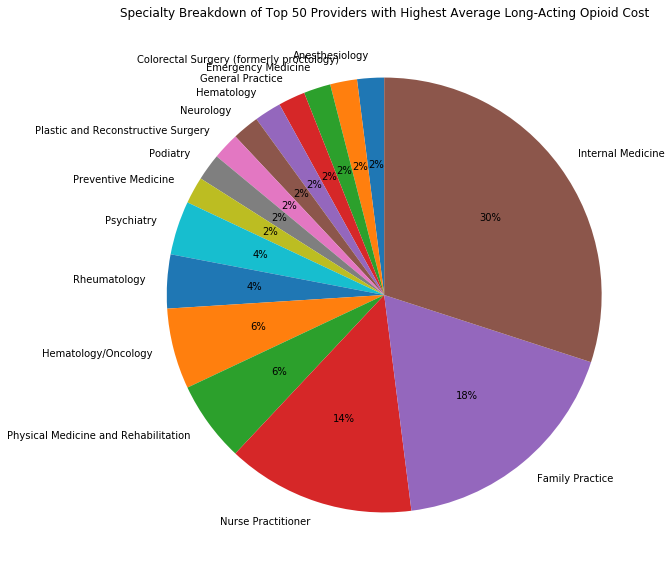

In [52]:
# Generate Provider Specialty Pie Chart Breakdown for Top 50
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('white')
ax.set_title("Specialty Breakdown of Top 50 Providers with Highest Average Long-Acting Opioid Cost")
ax.pie(x=df_merged_la_opioid_specailty['provider_count'], labels=df_merged_la_opioid_specailty['specialty_description'], startangle=90, autopct='%.0f%%')

#### FINDINGS OF NOTE
* (Average Long-Acting Opioid Cost = Total Long-Acting Opioid Drug Cost / Total Long-Acting Opioid Claims) on a provider basis
* Of the top 50 providers with highest average opioid cost (range of 2239.12 - 7610.47) the most frequent specialties were Internal Medicine (30%), Family Practice (18%), Nurse Practitioner (14%), Physical Medicine and Rehabilitation (6%), and Hematology/Oncology (6%).
* Family Practice exhibited a large increase from 8% for opioid to 18% for long-acting opioids.

### Project Part 3: Opioid Provider Dataset Creation
* Contains aggregated dataset of providers based on NPI which reported values for opioid or long-acting opioid characteristics for the calendar years 2013 - 2017

In [6]:
# Create temporary copy of all providers 
df_opioid_temp = dfSummaryTables.copy() 
df_opioid_temp.sample(5)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score,year
457603,1437253804,SICKLES,GARY,NaN,DDS,M,I,171 S MAIZE RD,NaN,WICHITA,...,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.9596,2013
496260,1467444786,MOUNT,JERRE,M,PA-C,F,I,2091 BOX BUTTE AVENUE,SUITE 700,ALLIANCE,...,349.0,NaN,NaN,26.0,NaN,NaN,272.0,123.0,1.4213,2014
1053099,1902839368,FRESON,DANIEL,R,O.D.,M,I,2012 W 25TH ST LBBY 1,NaN,CLEVELAND,...,NaN,NaN,NaN,18.0,0.0,0.0,NaN,NaN,0.9654,2017
480587,1417167354,GORELICK,ALISSA,R,D.O.,F,I,800 BIESTEFIELD RD.,"ALEXIAN BROTHERS MEDICAL CENTERM, EMERGENCY DEPT.",ELK GROVE VILLAGE,...,110.0,NaN,NaN,NaN,0.0,NaN,100.0,28.0,1.4222,2017
780163,1720240310,HELD,JUSTIN,D,M.D.,M,I,231 ALBERT SABIN WAY,ML 0535,CINCINNATI,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,2.5157,2014


In [7]:
# Fill missing opioid / long-acting opioid bene counts, claim counts, and prescriber rates with ZERO
df_opioid_temp[[
    'opioid_bene_count',
    'opioid_claim_count',
    'opioid_prescriber_rate',
    'opioid_drug_cost',
    'opioid_day_supply',
    'la_opioid_bene_count',
    'la_opioid_claim_count',
    'la_opioid_prescriber_rate',
    'la_opioid_drug_cost',
    'la_opioid_day_supply'
]] = df_opioid_temp[[
    'opioid_bene_count',
    'opioid_claim_count',
    'opioid_prescriber_rate',
    'opioid_drug_cost',
    'opioid_day_supply',
    'la_opioid_bene_count',
    'la_opioid_claim_count',
    'la_opioid_prescriber_rate',
    'la_opioid_drug_cost',
    'la_opioid_day_supply'
]].fillna(0)

In [8]:
# display sampling of opioid providers
df_opioid_temp[[
    'npi',
    'year',
    'opioid_bene_count',
    'opioid_claim_count',
    'opioid_prescriber_rate',
    'opioid_drug_cost',
    'opioid_day_supply',
    'la_opioid_bene_count',
    'la_opioid_claim_count',
    'la_opioid_prescriber_rate',
    'la_opioid_drug_cost',
    'la_opioid_day_supply'
]].sample(10)

,npi,year,opioid_bene_count,opioid_claim_count,opioid_prescriber_rate,opioid_drug_cost,opioid_day_supply,la_opioid_bene_count,la_opioid_claim_count,la_opioid_prescriber_rate,la_opioid_drug_cost,la_opioid_day_supply
958934,1891756045,2014,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
139745,1124264213,2015,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
423023,1376596189,2016,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
831951,1750448106,2015,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
101920,1093781049,2014,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
590178,1548589237,2014,17.0,18.0,6.29,204.90,114.0,0.0,0.0,0.0,0.0,0.0
831114,1710279724,2017,13.0,18.0,72.00,216.36,220.0,0.0,0.0,0.0,0.0,0.0
326104,1316006620,2013,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
539782,1477757565,2016,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
612686,1558456020,2015,83.0,133.0,37.25,2048.20,2414.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_opioid_temp.shape

(5518978, 85)

In [10]:
# Create Opioid and Long-Acting Opioid Provider Dataframe (remove providers with no opioid characteristics)
df_opioid_providers = df_opioid_temp[
    ((df_opioid_temp.opioid_prescriber_rate != 0) | (df_opioid_temp.la_opioid_prescriber_rate != 0))
].copy() 

df_opioid_providers.shape

(2489195, 85)

In [11]:
# Display opioid and long-acting opioid specific characteristics
df_opioid_providers[[
    'npi',
    'year',
    'total_claim_count',
    'bene_count',
    'opioid_bene_count',
    'opioid_claim_count',
    'opioid_prescriber_rate',
    'opioid_drug_cost',
    'opioid_day_supply',
    'la_opioid_bene_count',
    'la_opioid_claim_count',
    'la_opioid_prescriber_rate',
    'la_opioid_drug_cost',
    'la_opioid_day_supply'
]].sample(10)

,npi,year,total_claim_count,bene_count,opioid_bene_count,opioid_claim_count,opioid_prescriber_rate,opioid_drug_cost,opioid_day_supply,la_opioid_bene_count,la_opioid_claim_count,la_opioid_prescriber_rate,la_opioid_drug_cost,la_opioid_day_supply
391749,1336346386,2017,78,53.0,21.0,22.0,28.21,81.34,67.0,0.0,0.0,0.00,0.00,0.0
266183,1255376711,2013,217,155.0,23.0,27.0,12.44,142.05,59.0,0.0,0.0,0.00,0.00,0.0
575503,1508911819,2016,223,125.0,35.0,46.0,20.63,290.67,276.0,0.0,0.0,0.00,0.00,0.0
930631,1821077264,2016,101,73.0,25.0,25.0,24.75,153.68,83.0,0.0,0.0,0.00,0.00,0.0
409064,1356330799,2017,4193,323.0,30.0,107.0,2.55,1506.66,2855.0,0.0,11.0,10.28,430.20,264.0
367113,1316319106,2017,1648,311.0,59.0,220.0,13.35,6253.28,6242.0,0.0,14.0,6.36,1194.16,420.0
730537,1629389549,2017,446,177.0,21.0,32.0,7.17,2928.12,941.0,0.0,0.0,0.00,0.00,0.0
261076,1245498989,2013,1990,224.0,40.0,126.0,6.33,1491.92,3015.0,0.0,0.0,0.00,0.00,0.0
105953,1093728487,2016,66,45.0,18.0,18.0,27.27,203.19,44.0,0.0,0.0,0.00,0.00,0.0
334075,1316940125,2013,338,111.0,61.0,180.0,53.25,2950.73,1601.0,0.0,0.0,0.00,0.00,0.0


In [12]:
# Create dataframe of opioid characteristic mean values by provider
df_provider_mean = df_opioid_providers[[
    'npi',
    'total_claim_count',
    'bene_count',
    'opioid_bene_count',
    'opioid_claim_count',
    'opioid_prescriber_rate',
    'opioid_drug_cost',
    'opioid_day_supply',
    'la_opioid_bene_count',
    'la_opioid_claim_count',
    'la_opioid_prescriber_rate',
    'la_opioid_drug_cost',
    'la_opioid_day_supply'
]].groupby(['npi']).mean().reset_index()

df_provider_mean

,npi,total_claim_count,bene_count,opioid_bene_count,opioid_claim_count,opioid_prescriber_rate,opioid_drug_cost,opioid_day_supply,la_opioid_bene_count,la_opioid_claim_count,la_opioid_prescriber_rate,la_opioid_drug_cost,la_opioid_day_supply
0,1003000126,617.00,206.20,24.20,27.80,4.4820,423.4980,211.20,0.0,0.0,0.0000,0.000,0.0
1,1003000142,1377.00,196.20,134.00,701.00,50.1060,29603.3060,19766.20,29.4,120.8,15.4560,18232.432,3485.8
2,1003000167,54.80,31.80,10.40,16.60,30.1840,76.1200,39.60,0.0,0.0,0.0000,0.000,0.0
3,1003000282,114.00,50.00,17.00,21.00,18.4200,443.6300,587.00,0.0,0.0,0.0000,0.000,0.0
4,1003000407,1449.60,172.60,14.00,22.00,2.4100,745.4780,296.00,0.0,3.0,9.3760,263.468,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
704458,1992999551,2004.50,300.00,43.75,108.00,4.7675,2456.5850,2795.00,0.0,0.0,0.0000,0.000,0.0
704459,1992999791,225.25,39.75,4.00,33.25,18.7225,11948.6800,979.50,0.0,6.0,23.0775,9794.760,180.0
704460,1992999817,44.20,27.40,16.80,25.80,58.5280,377.6560,140.40,0.0,0.0,0.0000,0.000,0.0
704461,1992999825,276.00,133.80,24.00,25.40,9.1860,312.9480,137.00,0.0,0.0,0.0000,0.000,0.0


In [19]:
df_provider_mean[['opioid_bene_count','opioid_claim_count']].describe()

,opioid_bene_count,opioid_claim_count
count,704463.000000,704463.000000
mean,38.609345,124.341387
std,53.978986,314.020527
min,0.000000,11.000000
25%,12.000000,19.333333
50%,23.000000,38.000000
75%,46.800000,103.000000
max,3258.200000,19861.400000


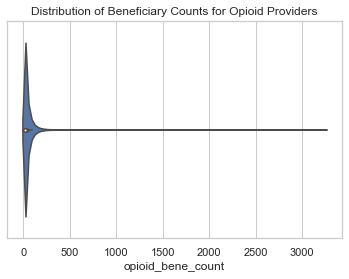

In [13]:
# Plot Beneficiary Count Distribution for Opioid Providers
sns.set(style="whitegrid")
ax = sns.violinplot(x=df_provider_mean['opioid_bene_count']).set_title('Distribution of Beneficiary Counts for Opioid Providers')

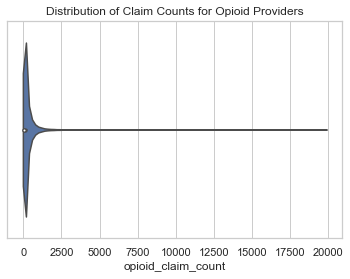

In [14]:
# Plot Beneficiary Count Distribution for Opioid Providers
sns.set(style="whitegrid")
ax = sns.violinplot(x=df_provider_mean['opioid_claim_count']).set_title('Distribution of Claim Counts for Opioid Providers')

In [20]:
df_provider_mean[['la_opioid_bene_count','la_opioid_claim_count']].describe()

,la_opioid_bene_count,la_opioid_claim_count
count,704463.000000,704463.000000
mean,2.514243,15.301676
std,15.195694,80.812621
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,2.600000
max,1030.200000,6829.600000


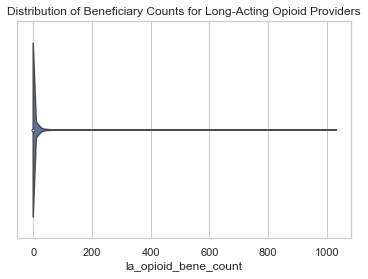

In [15]:
# Plot Beneficiary Count Distribution for Long-Acting Opioid Providers
sns.set(style="whitegrid")
ax = sns.violinplot(x=df_provider_mean['la_opioid_bene_count']).set_title('Distribution of Beneficiary Counts for Long-Acting Opioid Providers')

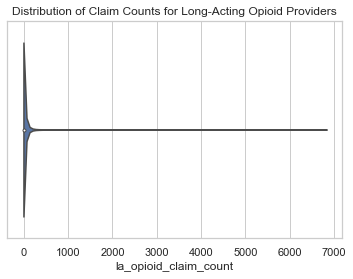

In [16]:
# Plot Beneficiary Count Distribution for Long-Acting Opioid Providers
sns.set(style="whitegrid")
ax = sns.violinplot(x=df_provider_mean['la_opioid_claim_count']).set_title('Distribution of Claim Counts for Long-Acting Opioid Providers')

In [21]:
df_provider_mean[['opioid_prescriber_rate','la_opioid_prescriber_rate']].describe()

,opioid_prescriber_rate,la_opioid_prescriber_rate
count,704463.000000,704463.000000
mean,18.080708,3.943259
std,18.691118,9.198317
min,0.030000,0.000000
25%,4.054000,0.000000
50%,9.744000,0.000000
75%,27.315000,1.467750
max,100.000000,100.000000


In [22]:
df_provider_mean[['total_claim_count','bene_count']].describe()

,total_claim_count,bene_count
count,704463.000000,700156.000000
mean,1895.568022,180.596029
std,3682.892395,196.362291
min,11.000000,11.000000
25%,138.600000,57.500000
50%,444.000000,120.400000
75%,2007.000000,240.200000
max,290140.600000,31872.000000


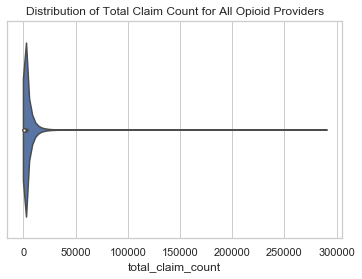

In [23]:
# Plot Beneficiary Count Distribution for Long-Acting Opioid Providers
sns.set(style="whitegrid")
ax = sns.violinplot(x=df_provider_mean['total_claim_count']).set_title('Distribution of Total Claim Count for All Opioid Providers')

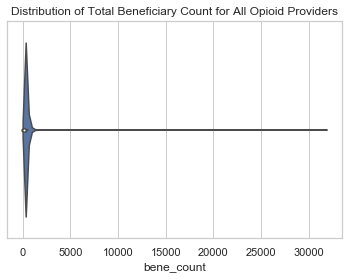

In [24]:
# Plot Beneficiary Count Distribution for Long-Acting Opioid Providers
sns.set(style="whitegrid")
ax = sns.violinplot(x=df_provider_mean['bene_count']).set_title('Distribution of Total Beneficiary Count for All Opioid Providers')

In [17]:
df_opioid_only = df_provider_mean[(df_provider_mean.opioid_prescriber_rate > 0) & (df_provider_mean.la_opioid_prescriber_rate > 0)]
df_opioid_only

,npi,total_claim_count,bene_count,opioid_bene_count,opioid_claim_count,opioid_prescriber_rate,opioid_drug_cost,opioid_day_supply,la_opioid_bene_count,la_opioid_claim_count,la_opioid_prescriber_rate,la_opioid_drug_cost,la_opioid_day_supply
1,1003000142,1377.00,196.200000,134.0,701.000000,50.106000,29603.306,19766.200000,29.4,120.800000,15.456000,18232.432000,3485.8
4,1003000407,1449.60,172.600000,14.0,22.000000,2.410000,745.478,296.000000,0.0,3.000000,9.376000,263.468000,52.0
6,1003000522,5321.60,444.200000,55.2,190.800000,3.572000,4537.790,4170.600000,0.0,2.400000,0.988000,128.470000,69.0
7,1003000530,6500.80,446.800000,44.0,208.200000,3.206000,10773.586,5534.200000,0.0,44.800000,21.562000,7224.632000,1340.0
14,1003001256,212.80,66.600000,14.8,25.000000,11.722000,955.738,534.400000,0.0,2.800000,8.236000,92.362000,62.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
704444,1992997647,4300.40,305.000000,94.0,562.400000,13.112000,26523.024,14371.000000,19.2,109.200000,19.182000,13774.098000,3183.8
704447,1992998439,551.00,54.666667,22.0,87.666667,15.733333,14447.420,2331.333333,0.0,25.666667,32.203333,11161.193333,759.0
704453,1992998926,437.00,119.400000,13.0,28.000000,6.872000,1044.232,380.200000,0.0,5.800000,13.040000,420.894000,180.0
704455,1992999031,1387.60,233.200000,51.4,135.200000,9.864000,5603.782,3245.600000,11.6,30.000000,22.578000,2442.650000,890.0


In [18]:
df = df_provider_mean[(df_provider_mean.la_opioid_prescriber_rate == 0)]
df

,npi,total_claim_count,bene_count,opioid_bene_count,opioid_claim_count,opioid_prescriber_rate,opioid_drug_cost,opioid_day_supply,la_opioid_bene_count,la_opioid_claim_count,la_opioid_prescriber_rate,la_opioid_drug_cost,la_opioid_day_supply
0,1003000126,617.00,206.200000,24.20,27.800000,4.482000,423.498000,211.200000,0.0,0.0,0.0,0.0,0.0
2,1003000167,54.80,31.800000,10.40,16.600000,30.184000,76.120000,39.600000,0.0,0.0,0.0,0.0,0.0
3,1003000282,114.00,50.000000,17.00,21.000000,18.420000,443.630000,587.000000,0.0,0.0,0.0,0.0,0.0
5,1003000480,63.00,29.666667,4.00,13.666667,21.763333,338.916667,92.333333,0.0,0.0,0.0,0.0,0.0
8,1003000597,378.50,149.250000,47.00,53.000000,18.300000,338.460000,284.750000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
704457,1992999437,245.60,153.600000,58.00,58.200000,23.386000,358.792000,332.800000,0.0,0.0,0.0,0.0,0.0
704458,1992999551,2004.50,300.000000,43.75,108.000000,4.767500,2456.585000,2795.000000,0.0,0.0,0.0,0.0,0.0
704460,1992999817,44.20,27.400000,16.80,25.800000,58.528000,377.656000,140.400000,0.0,0.0,0.0,0.0,0.0
704461,1992999825,276.00,133.800000,24.00,25.400000,9.186000,312.948000,137.000000,0.0,0.0,0.0,0.0,0.0


### Yearly Opioid Provider Dataset - ON HOLD
* NOTE: Put on hold due to difficulties extracting timeframe from DOJ Press Releases

In [12]:
# number of unique opioid providers by year
df_yearly = pd.DataFrame()
df_yearly = df_opioid_providers['year'].value_counts().rename_axis('year').reset_index(name='provider_count')
df_yearly.sort_values(['year'], ascending=True, inplace=True)
df_yearly

,year,provider_count
3,2013,495900
0,2014,502754
1,2015,499563
2,2016,499147
4,2017,491831


In [13]:
df_sorted = df_opioid_providers.sort_values(['total_claim_count'], ascending=True)
df_sorted[
    ['npi',
     'nppes_provider_last_org_name',
     'opioid_prescriber_rate',
     'total_claim_count', 
     'opioid_claim_count', 
     'year']
].tail(10)

,npi,nppes_provider_last_org_name,opioid_prescriber_rate,total_claim_count,opioid_claim_count,year
130690,1124047717,RICHARD,5.39,177019,9535.0,2014
792205,1750432969,HURLEY,4.14,191529,7926.0,2013
809622,1750432969,HURLEY,3.40,192318,6545.0,2014
133973,1124047717,RICHARD,5.11,194333,9929.0,2015
95882,1083619670,TAYLOR,2.64,202291,5342.0,2017
137371,1124047717,RICHARD,4.41,225692,9942.0,2016
307711,1285761833,FRINKS,3.99,226081,9025.0,2014
316226,1285761833,FRINKS,2.98,295103,8805.0,2015
324654,1285761833,FRINKS,2.96,324209,9592.0,2016
333750,1285761833,FRINKS,2.33,447288,10419.0,2017


In [123]:
df_change = pd.DataFrame()

df_change = df_opioid_providers[[
    'npi',
    'year',
    'total_claim_count',
    'opioid_bene_count',
    'opioid_claim_count',
    'opioid_prescriber_rate',
    'la_opioid_bene_count',
    'la_opioid_claim_count',
    'la_opioid_prescriber_rate'
]]

df_change

,npi,year,total_claim_count,opioid_bene_count,opioid_claim_count,opioid_prescriber_rate,la_opioid_bene_count,la_opioid_claim_count,la_opioid_prescriber_rate
107021,1093758724,2016,66813,0.0,16.0,0.02,0.0,0.0,0.00
421009,1376541961,2016,46337,0.0,11.0,0.02,0.0,0.0,0.00
236061,1215997994,2014,35830,0.0,12.0,0.03,0.0,0.0,0.00
1027565,1932172020,2015,40675,0.0,14.0,0.03,0.0,0.0,0.00
987575,1871579524,2016,35405,11.0,11.0,0.03,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...
985506,1841561396,2017,12,0.0,12.0,100.00,0.0,0.0,0.00
749000,1649316894,2017,11,11.0,11.0,100.00,0.0,0.0,0.00
566598,1508019878,2016,42,20.0,42.0,100.00,0.0,20.0,47.62
1152,1003062290,2015,35,35.0,35.0,100.00,0.0,0.0,0.00


In [124]:
p = df_change.pivot(index='npi', columns='year')

In [125]:
type(p)

pandas.core.frame.DataFrame

In [130]:
df_pivot = p.fillna(0)

In [131]:
# Pivoted Dataframe for Opioid Providers
df_pivot[
    ['total_claim_count',
     'opioid_bene_count',
     'opioid_claim_count',
     'opioid_prescriber_rate']
].sample(10)

total_claim_count                                      \
year                    2013     2014     2015     2016     2017   
npi                                                                
1154354389              64.0     85.0     75.0     90.0    107.0   
1104951144            4130.0      0.0      0.0      0.0      0.0   
1841216751             333.0    450.0    361.0    420.0    319.0   
1538137948             174.0    101.0    165.0    193.0    135.0   
1225573900               0.0      0.0      0.0      0.0    551.0   
1114922622           11080.0  11773.0  12134.0  12020.0  11494.0   
1639494933               0.0      0.0      0.0    222.0    172.0   
1295045771               0.0      0.0      0.0      0.0     76.0   
1588666036             779.0    600.0      0.0      0.0      0.0   
1508232240               0.0      0.0    232.0    179.0    114.0   

           opioid_bene_count                          opioid_claim_count  \
year                    2013   2014  2015  2016  2017               2013   
npi                                                                        
1154354389              30.0   33.0  25.0  24.0  27.0               39.0   
1104951144               0.0    0.0   0.0   0.0   0.0               17.0   
1841216751              31.0   34.0  31.0  37.0  25.0               46.0   
1538137948              29.0   24.0  37.0  38.0  24.0               33.0   
1225573900               0.0    0.0   0.0   0.0  13.0                0.0   
1114922622             103.0  100.0  97.0  77.0  85.0              425.0   
1639494933               0.0    0.0   0.0  17.0  14.0                0.0   
1295045771               0.0    0.0   0.0   0.0   0.0                0.0   
1588666036              20.0   12.0   0.0   0.0   0.0               28.0   
1508232240               0.0    0.0  89.0  42.0  19.0                0.0   

                                       opioid_prescriber_rate                \
year         2014   2015   2016   2017                   2013   2014   2015   
npi                                                                           
1154354389   48.0   30.0   34.0   37.0                  60.94  56.47  40.00   
1104951144    0.0    0.0    0.0    0.0                   0.41   0.00   0.00   
1841216751   57.0   37.0   46.0   33.0                  13.81  12.67  10.25   
1538137948   27.0   39.0   43.0   24.0                  18.97  26.73  23.64   
1225573900    0.0    0.0    0.0   18.0                   0.00   0.00   0.00   
1114922622  448.0  414.0  374.0  419.0                   3.84   3.81   3.41   
1639494933    0.0    0.0   20.0   14.0                   0.00   0.00   0.00   
1295045771    0.0    0.0    0.0   12.0                   0.00   0.00   0.00   
1588666036   12.0    0.0    0.0    0.0                   3.59   2.00   0.00   
1508232240    0.0  133.0   50.0   22.0                   0.00   0.00  57.33   

                          
year         2016   2017  
npi                       
1154354389  37.78  34.58  
1104951144   0.00   0.00  
1841216751  10.95  10.34  
1538137948  22.28  17.78  
1225573900   0.00   3.27  
1114922622   3.11   3.65  
1639494933   9.01   8.14  
1295045771   0.00  15.79  
1588666036   0.00   0.00  
1508232240  27.93  19.30

In [132]:
# Pivoted Dataframe for Long-Acting Opioid Providers
df_pivot[
    ['total_claim_count',
     'la_opioid_bene_count',
     'la_opioid_claim_count',
     'la_opioid_prescriber_rate']
].sample(10)

total_claim_count                                  \
year                    2013    2014    2015    2016    2017   
npi                                                            
1356488704             128.0   186.0   211.0     0.0     0.0   
1538247242             139.0     0.0    93.0    66.0    97.0   
1851484026            5599.0  6469.0  7949.0  7591.0     0.0   
1710997689              56.0    81.0    84.0    55.0    67.0   
1942444344              82.0   180.0   171.0   232.0   215.0   
1033416391             416.0     0.0     0.0     0.0     0.0   
1174864144               0.0     0.0    53.0    76.0    36.0   
1629028048            1818.0  2043.0  2452.0  2930.0  2912.0   
1053406389             747.0   759.0   437.0     0.0     0.0   
1790189884               0.0     0.0   156.0   294.0  2095.0   

           la_opioid_bene_count                         la_opioid_claim_count  \
year                       2013  2014  2015  2016  2017                  2013   
npi                                                                             
1356488704                  0.0   0.0   0.0   0.0   0.0                   0.0   
1538247242                  0.0   0.0   0.0   0.0   0.0                   0.0   
1851484026                  0.0   0.0   0.0   0.0   0.0                  11.0   
1710997689                  0.0   0.0   0.0   0.0   0.0                   0.0   
1942444344                  0.0  22.0  16.0  15.0  11.0                   0.0   
1033416391                  0.0   0.0   0.0   0.0   0.0                   0.0   
1174864144                  0.0   0.0   0.0   0.0   0.0                   0.0   
1629028048                  0.0   0.0   0.0   0.0   0.0                   0.0   
1053406389                  0.0   0.0   0.0   0.0   0.0                  14.0   
1790189884                  0.0   0.0   0.0   0.0   0.0                   0.0   

                                   la_opioid_prescriber_rate                \
year        2014  2015  2016  2017                      2013   2014   2015   
npi                                                                          
1356488704   0.0   0.0   0.0   0.0                      0.00   0.00   0.00   
1538247242   0.0   0.0   0.0   0.0                      0.00   0.00   0.00   
1851484026  12.0  16.0   0.0   0.0                      2.33   2.03   1.92   
1710997689   0.0   0.0   0.0   0.0                      0.00   0.00   0.00   
1942444344  22.0  16.0  15.0  12.0                      0.00  19.30  15.09   
1033416391   0.0   0.0   0.0   0.0                      0.00   0.00   0.00   
1174864144   0.0   0.0   0.0   0.0                      0.00   0.00   0.00   
1629028048  12.0   0.0   0.0   0.0                      0.00  15.19   0.00   
1053406389  34.0  12.0   0.0   0.0                     11.57  28.10  27.27   
1790189884   0.0   0.0   0.0  12.0                      0.00   0.00   0.00   

                          
year         2016   2017  
npi                       
1356488704   0.00   0.00  
1538247242   0.00   0.00  
1851484026   0.00   0.00  
1710997689   0.00   0.00  
1942444344  10.14   8.33  
1033416391   0.00   0.00  
1174864144   0.00   0.00  
1629028048   0.00   0.00  
1053406389   0.00   0.00  
1790189884   0.00  13.33